In [3]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

from math import pi

import warnings
warnings.filterwarnings("ignore")

# MATRIX and BOX PLOTS (MISSINGNO)

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
df_dict={"col1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        "col2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
        "col3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}

data=pd.DataFrame(df_dict)

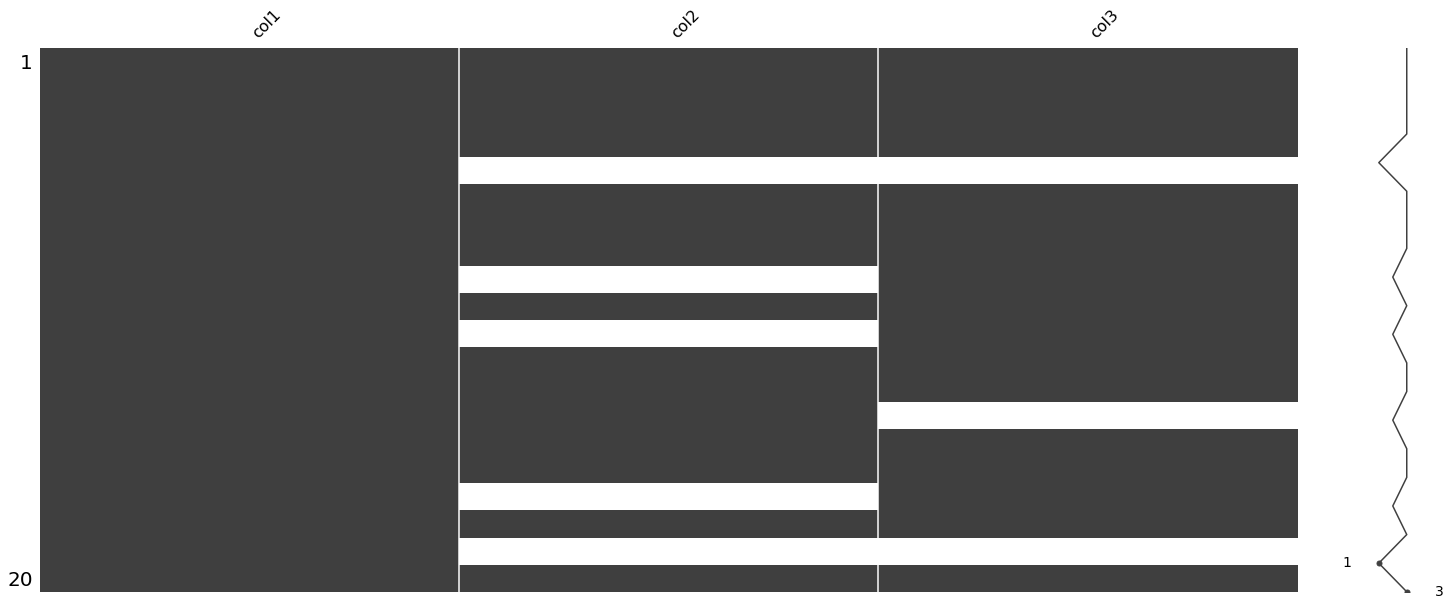

In [10]:
import missingno as msno

msno.matrix(data);

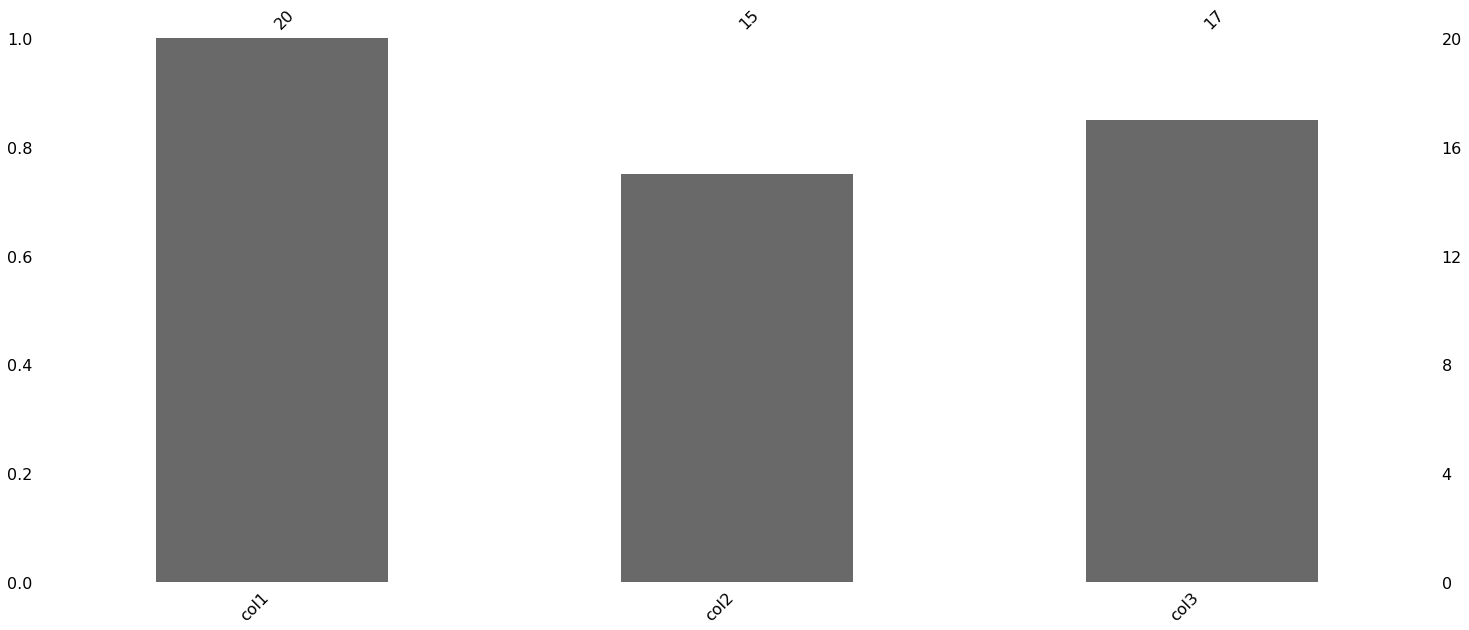

In [9]:
msno.bar(data);

# PARALLEL PLOTS (PANDAS)

* It  allow to compare the feature of several individual observations on a set of numerical variables.

In [13]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


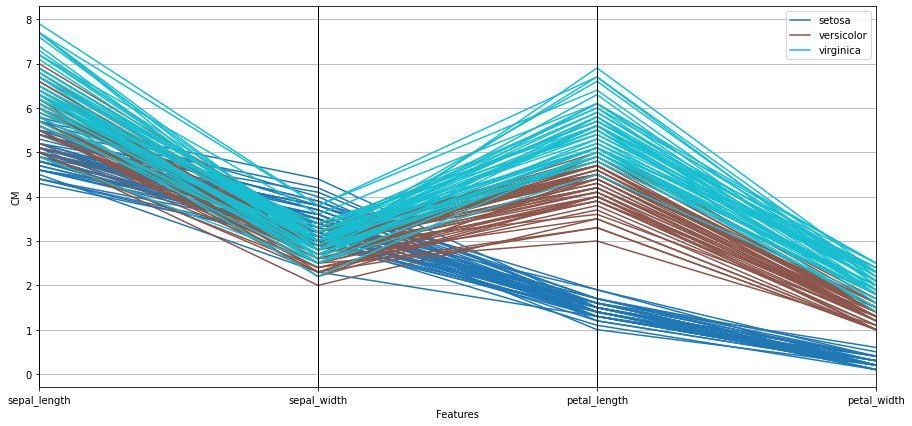

In [14]:
plt.figure(figsize=(15,7))
parallel_coordinates(df,"species",colormap=plt.get_cmap("tab10"))
plt.xlabel("Features")
plt.ylabel("CM")
plt.savefig('graph.png')

# NETWORK CHARTS (NETWORKX)

* It can be used instead of heatmaps in seaborn library.

In [17]:
corr=df.iloc[:,0:4].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


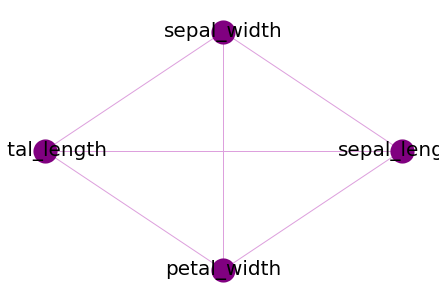

In [24]:
import networkx as nx

links=corr.stack().reset_index()
links.columns=["var1","var2","value"]

threshold=-1

links_filtered=links.loc[ (links["value"]>=threshold) & (links["var1"] != links["var2"])]

g=nx.from_pandas_edgelist(links_filtered,"var1","var2")

nx.draw_circular(g,with_labels=True,node_color="purple",node_size=200, edge_color='plum', linewidths=10, font_size=20)

# DONUT (MATPLOTLIB)

In [33]:
sepal_length = df.iloc[:,0]
sepal_width = df.iloc[:,1]
petal_length = df.iloc[:,2]
petal_width = df.iloc[:,3]

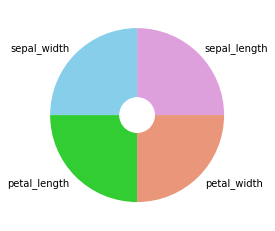

In [34]:
features="sepal_length","sepal_width","petal_length","petal_width"
sizes=[len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]

circle=plt.Circle((0,0),0.2,color="white")
plt.pie(sizes,labels=features,colors=["plum","skyblue","limegreen","darksalmon"])
p=plt.gcf()
p.gca().add_artist(circle)

# VENN (MATPLOTLIB)

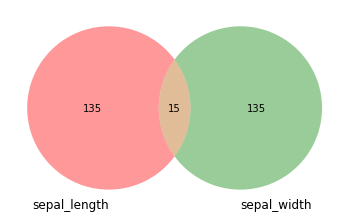

In [35]:
from matplotlib_venn import venn2
sepal_length = df.iloc[:,0]
sepal_width = df.iloc[:,1]
petal_length = df.iloc[:,2]
petal_width = df.iloc[:,3]
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

# SPIDER CHART (MATPLOTLIB)

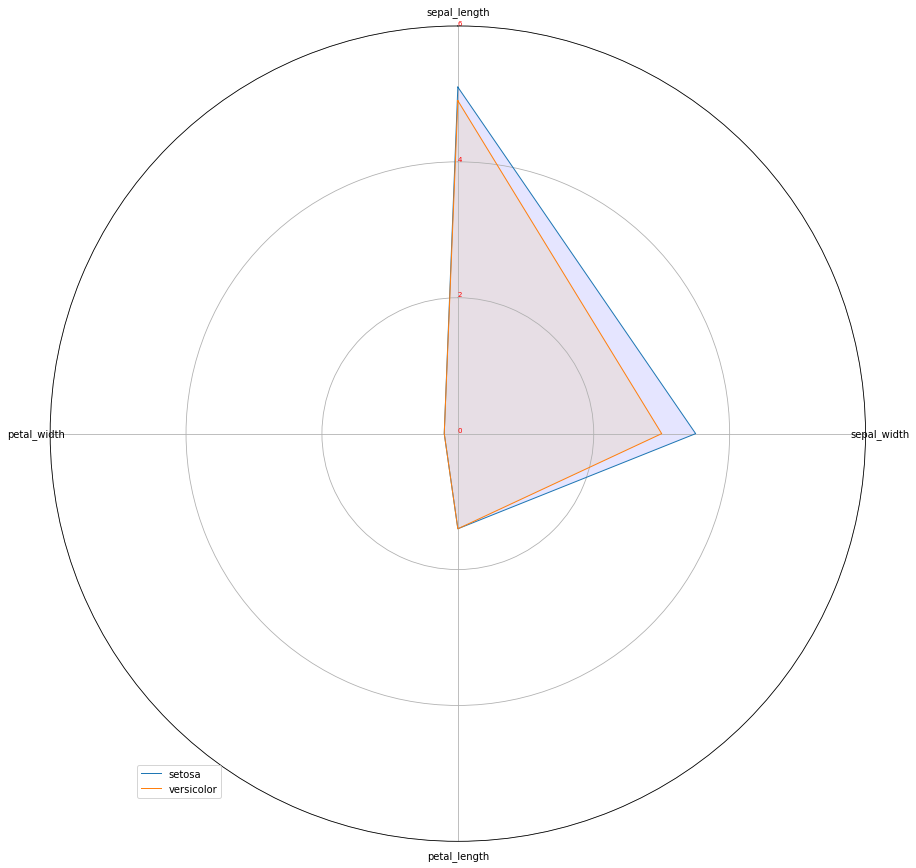

In [39]:
cat=list(df)[:4]
N=len(cat)

angles=[n / float(N)*2*pi for n in range(N)]
angles=angles+angles[:1]
plt.figure(figsize=(15,15))
ax=plt.subplot(111,polar=True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],cat)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)
values = df.loc[0].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = df.loc[1].drop("species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1));

# CLUSTER MAP (SEABORN)

In [44]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


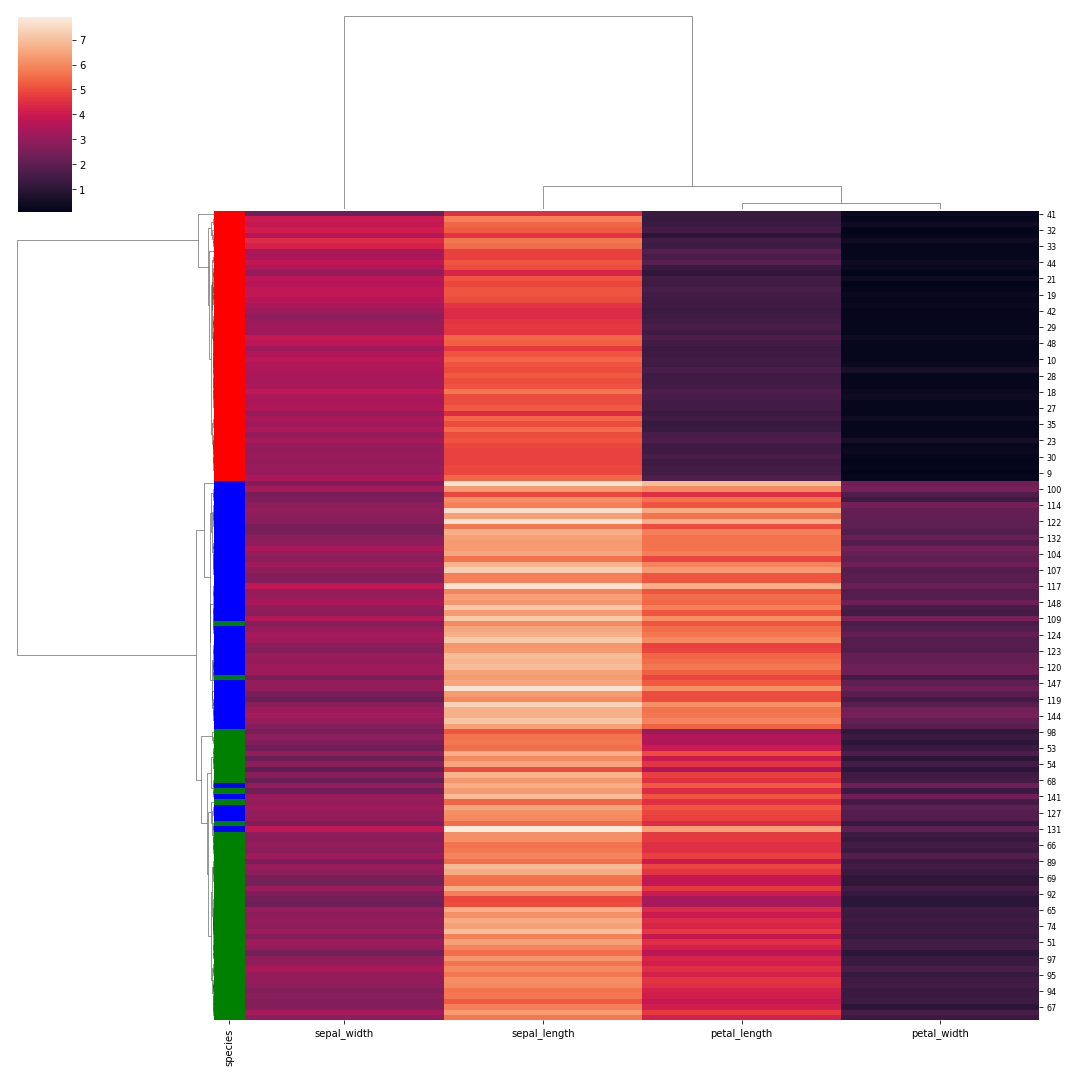

In [47]:
df_new=df.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]
df1=df.species

x=dict(zip(df1.unique(),"rgb"))
row_colors=df1.map(x)
cg=sns.clustermap(df_new,row_colors=row_colors,figsize=(15,15),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0,size=8)
plt.show()